<a href="https://colab.research.google.com/github/galenzo17/AI-personal-test/blob/main/Democracia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-41c84d6d7ac6>:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="viridis")


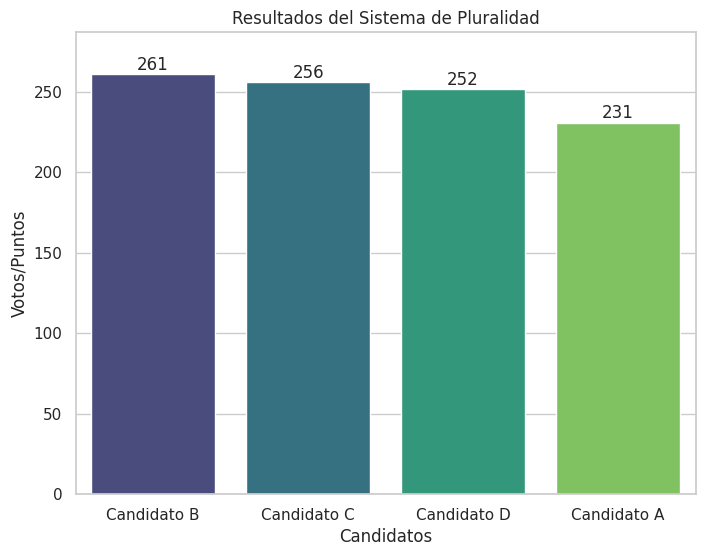

<ipython-input-1-41c84d6d7ac6>:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="viridis")


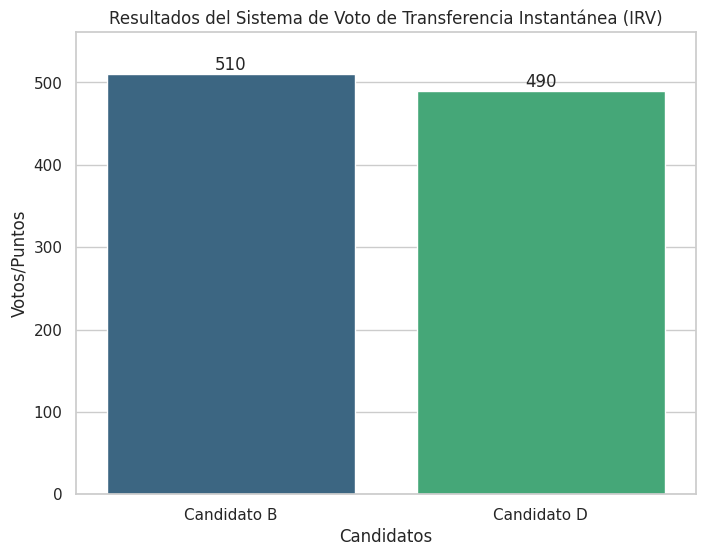

<ipython-input-1-41c84d6d7ac6>:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="viridis")


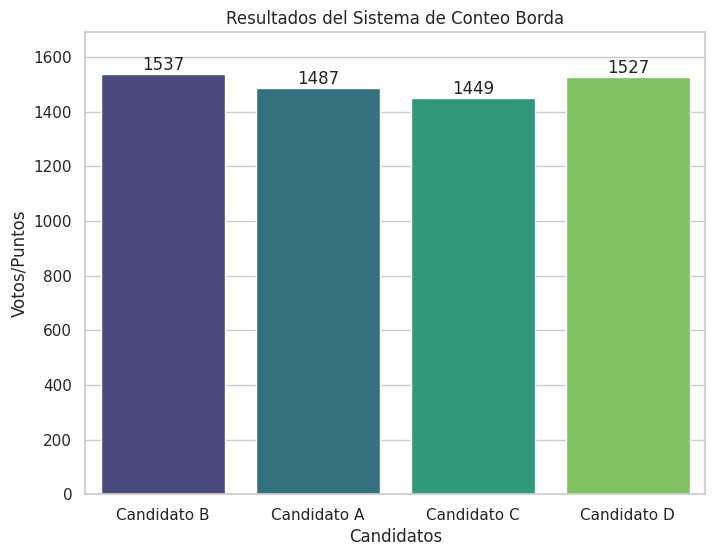

<ipython-input-1-41c84d6d7ac6>:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="viridis")


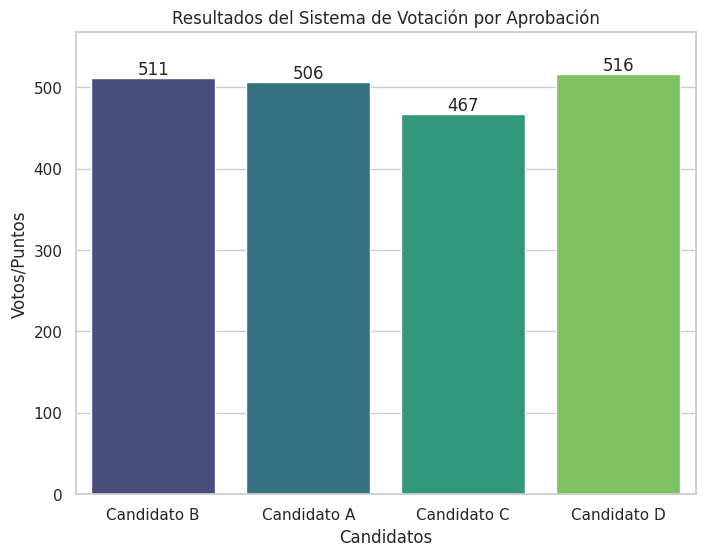

Comparación de Sistemas de Votación:


,Sistema,Ganador,Votos/Puntos,% Apoyo
0,Pluralidad,Candidato B,261,26.1
1,IRV,Candidato B,510,51.0
2,Borda Count,Candidato B,1537,153.7
3,Votación por Aprobación,Candidato D,516,51.6


<ipython-input-1-41c84d6d7ac6>:187: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sistema', y='% Apoyo', data=results, palette="magma")


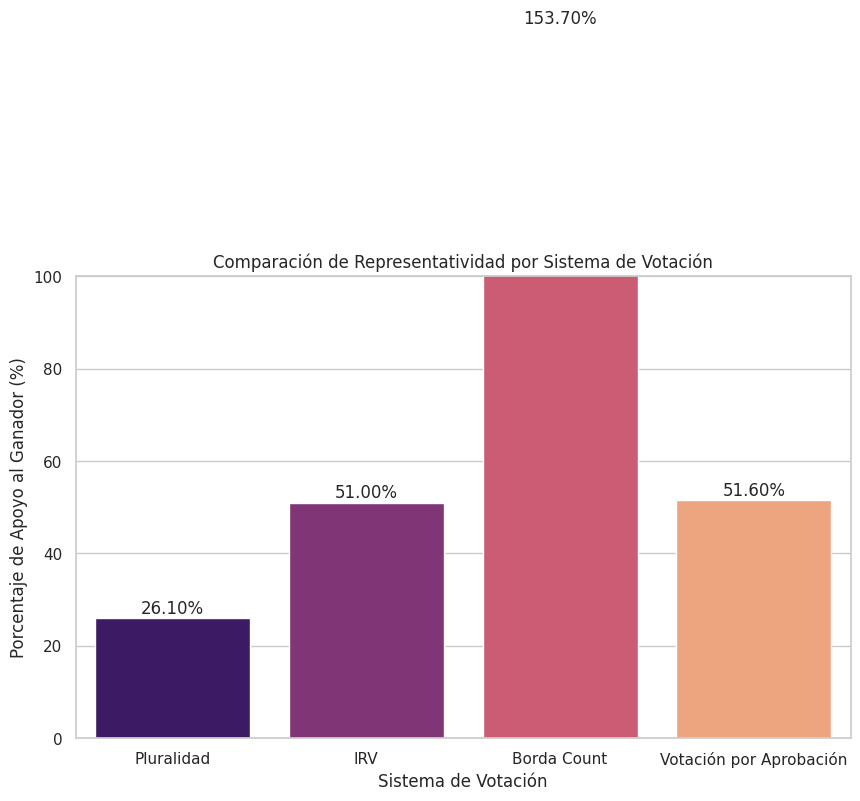

Conclusiones sobre la representatividad de cada sistema de votación:
- Pluralidad: Candidato B con un 26.10% de apoyo.
- IRV: Candidato B con un 51.00% de apoyo.
- Borda Count: Candidato B con un 153.70% de apoyo.
- Votación por Aprobación: Candidato D con un 51.60% de apoyo.
Comparación de Sistemas de Votación con Sesgo a la Izquierda:


,Sistema,Ganador,Votos/Puntos,% Apoyo
0,Pluralidad,Candidato B,512,51.2
1,IRV,Candidato B,512,51.2
2,Borda Count,Candidato B,2512,251.2
3,Votación por Aprobación,Candidato A,1000,100.0


<ipython-input-1-41c84d6d7ac6>:246: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sistema', y='% Apoyo', data=results_left, palette="coolwarm")


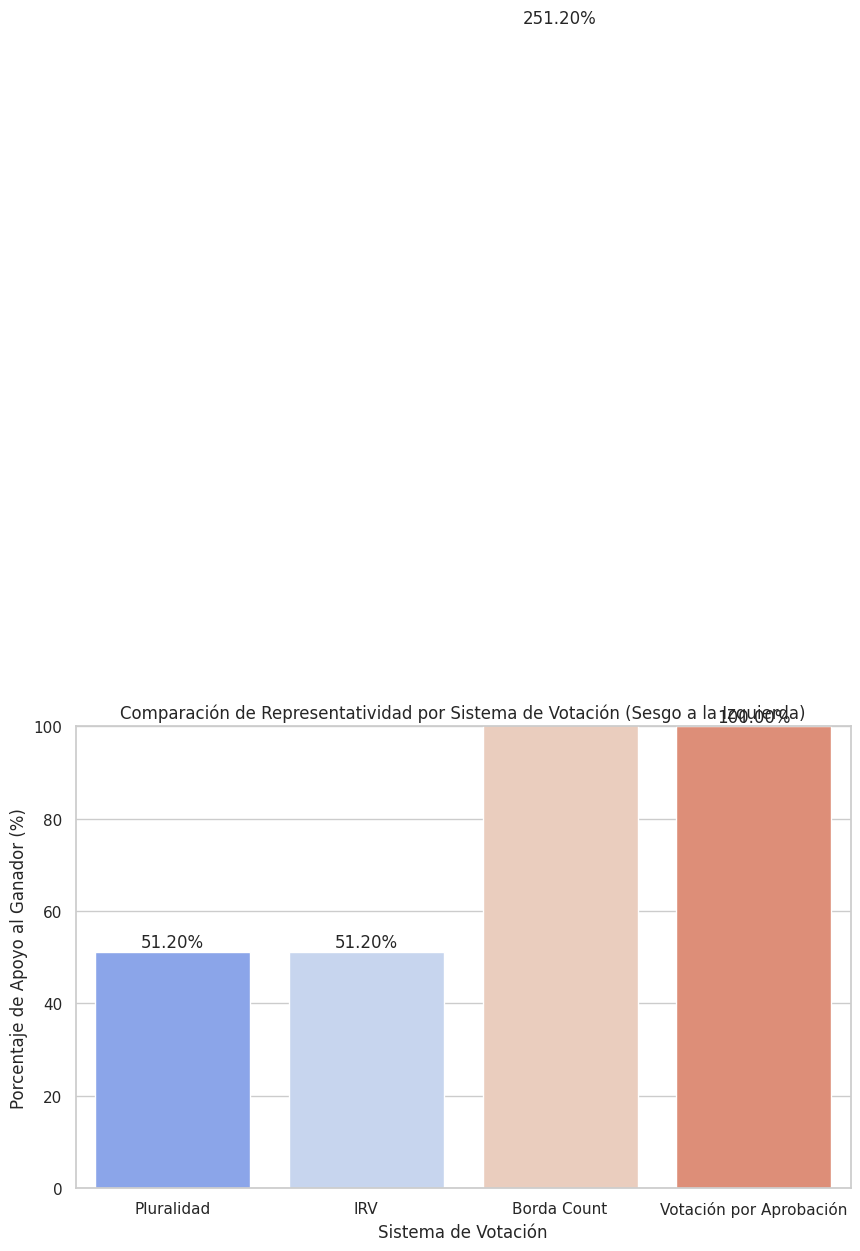

Conclusiones sobre la representatividad de cada sistema de votación (Sesgo a la Izquierda):
- Pluralidad: Candidato B con un 51.20% de apoyo.
- IRV: Candidato B con un 51.20% de apoyo.
- Borda Count: Candidato B con un 251.20% de apoyo.
- Votación por Aprobación: Candidato A con un 100.00% de apoyo.
Comparación de Sistemas de Votación con Sesgo a la Derecha:


,Sistema,Ganador,Votos/Puntos,% Apoyo
0,Pluralidad,Candidato C,537,53.7
1,IRV,Candidato C,537,53.7
2,Borda Count,Candidato C,2537,253.7
3,Votación por Aprobación,Candidato C,1000,100.0


<ipython-input-1-41c84d6d7ac6>:292: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sistema', y='% Apoyo', data=results_right, palette="winter")


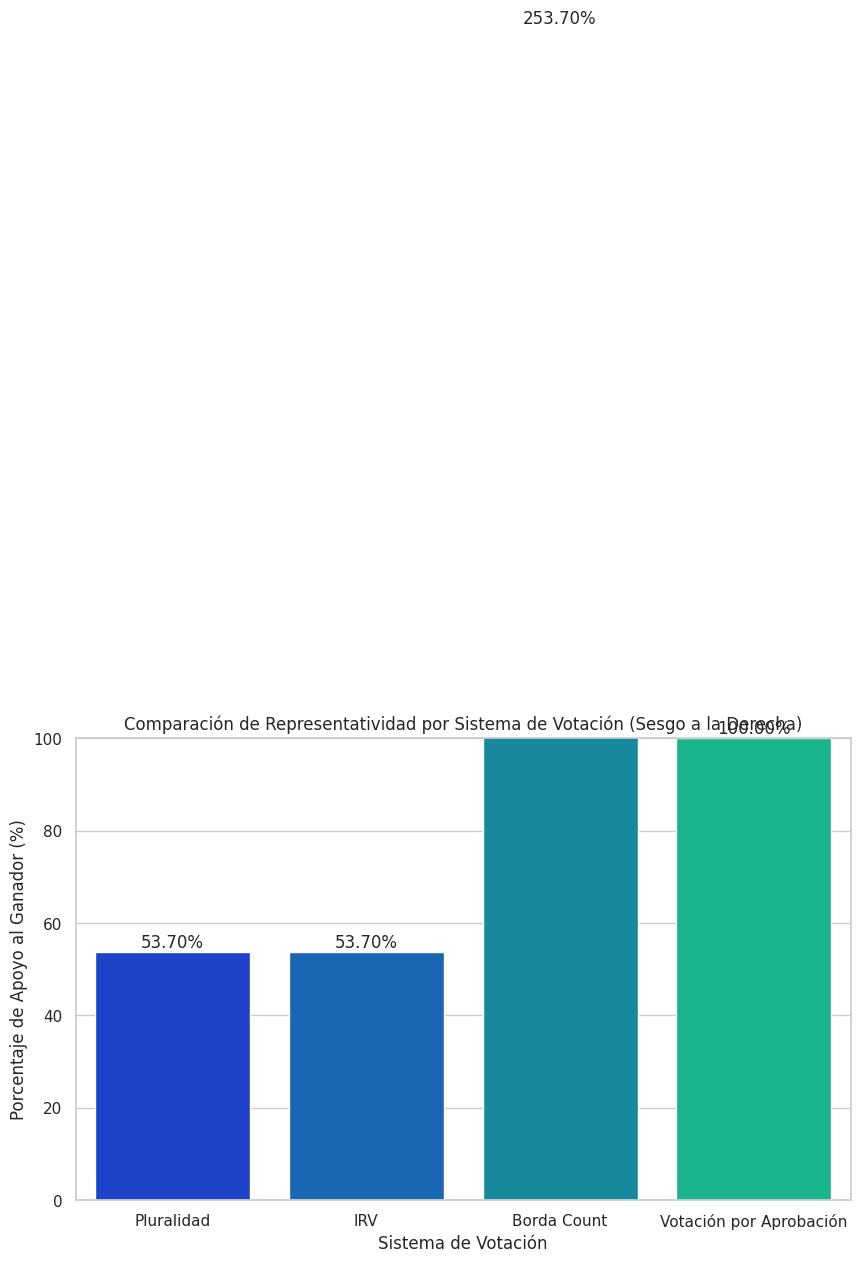

Conclusiones sobre la representatividad de cada sistema de votación (Sesgo a la Derecha):
- Pluralidad: Candidato C con un 53.70% de apoyo.
- IRV: Candidato C con un 53.70% de apoyo.
- Borda Count: Candidato C con un 253.70% de apoyo.
- Votación por Aprobación: Candidato C con un 100.00% de apoyo.
Resultados guardados como archivos CSV.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# # Simulación y Comparación de Sistemas de Votación

# Este bloque de código define y ejecuta diferentes modelos de votación, simula elecciones presidenciales, grafica los resultados y compara los sistemas de votación en términos de representatividad.

# ## 1. Instalación de Dependencias

# Aunque la mayoría de las librerías ya están instaladas en Google Colab, incluimos comandos de instalación para asegurarnos de que todas las dependencias estén disponibles.

# Instalar seaborn si no está instalado
!pip install seaborn --quiet

# ## 2. Importar Librerías Necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
import random
from google.colab import files

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")
%matplotlib inline

# ## 3. Definición de los Sistemas de Votación

### 3.1. Pluralidad

def plurality_voting(votes, candidates):
    """Sistema de Pluralidad: Gana el candidato con más votos de primera preferencia."""
    counts = Counter()
    for vote in votes:
        counts[vote[0]] += 1
    winner = counts.most_common(1)[0][0]
    return winner, counts

### 3.2. Voto de Transferencia Instantánea (IRV)

def instant_runoff_voting(votes, candidates):
    """Voto de Transferencia Instantánea (IRV): Eliminación progresiva del candidato con menos votos."""
    remaining = candidates.copy()
    while True:
        vote_counts = Counter()
        for vote in votes:
            for preference in vote:
                if preference in remaining:
                    vote_counts[preference] += 1
                    break
        total_votes = sum(vote_counts.values())
        # Verificar si algún candidato tiene más del 50%
        for candidate, count in vote_counts.items():
            if count > total_votes / 2:
                return candidate, vote_counts
        # Eliminar el candidato con menos votos
        if not vote_counts:
            return None, vote_counts  # No hay candidatos restantes
        loser = min(vote_counts, key=vote_counts.get)
        remaining.remove(loser)
        if len(remaining) == 0:
            return None, vote_counts  # Todos los candidatos han sido eliminados
        if len(remaining) == 1:
            return remaining[0], vote_counts

### 3.3. Conteo Borda

def borda_count(votes, candidates):
    """Conteo Borda: Los votantes asignan puntos a los candidatos según su preferencia."""
    borda_scores = defaultdict(int)
    num_candidates = len(candidates)
    for vote in votes:
        for idx, candidate in enumerate(vote):
            borda_scores[candidate] += num_candidates - idx - 1
    winner = max(borda_scores, key=borda_scores.get)
    return winner, borda_scores

### 3.4. Votación por Aprobación

def approval_voting(votes, candidates, approval_threshold=0.5):
    """Votación por Aprobación: Los votantes aprueban a los candidatos que están por encima de un umbral."""
    approval_counts = Counter()
    for vote in votes:
        # Aprobar a los candidatos en las primeras X posiciones
        num_approve = max(1, int(len(candidates) * approval_threshold))
        approved = vote[:num_approve]
        for candidate in approved:
            approval_counts[candidate] += 1
    winner = approval_counts.most_common(1)[0][0]
    return winner, approval_counts

# ## 4. Simulación de Elecciones

def generate_voters(num_voters, candidates, preference_skew='neutral'):
    """
    Genera preferencias de votantes.
    - preference_skew: 'neutral' para preferencias aleatorias,
                       'left' para inclinarse hacia los primeros candidatos,
                       'right' para inclinarse hacia los últimos candidatos.
    """
    votes = []
    for _ in range(num_voters):
        if preference_skew == 'neutral':
            vote = random.sample(candidates, len(candidates))
        elif preference_skew == 'left':
            # Los votantes prefieren a los primeros candidatos
            preferred = candidates[:len(candidates)//2]
            less_preferred = candidates[len(candidates)//2:]
            random.shuffle(preferred)
            random.shuffle(less_preferred)
            vote = preferred + less_preferred
        elif preference_skew == 'right':
            # Los votantes prefieren a los últimos candidatos
            preferred = candidates[len(candidates)//2:]
            less_preferred = candidates[:len(candidates)//2]
            random.shuffle(preferred)
            random.shuffle(less_preferred)
            vote = preferred + less_preferred
        else:
            vote = random.sample(candidates, len(candidates))
        votes.append(vote)
    return votes

# Parámetros de la simulación
num_voters = 1000
candidates = ['Candidato A', 'Candidato B', 'Candidato C', 'Candidato D']

# Generar preferencias de votantes
votes = generate_voters(num_voters, candidates, preference_skew='neutral')

# ## 5. Ejecutar los Sistemas de Votación

# Ejecutar Pluralidad
plurality_winner, plurality_counts = plurality_voting(votes, candidates)

# Ejecutar IRV
irv_winner, irv_counts = instant_runoff_voting(votes, candidates)

# Ejecutar Borda Count
borda_winner, borda_scores = borda_count(votes, candidates)

# Ejecutar Votación por Aprobación
approval_winner, approval_counts = approval_voting(votes, candidates, approval_threshold=0.5)

# ## 6. Visualización de los Resultados

def plot_results(system_name, counts, candidates):
    """Genera un gráfico de barras para los resultados de un sistema de votación."""
    plt.figure(figsize=(8,6))
    sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="viridis")
    plt.title(f'Resultados del Sistema de {system_name}')
    plt.xlabel('Candidatos')
    plt.ylabel('Votos/Puntos')
    plt.ylim(0, max(counts.values()) * 1.1)  # Ajusta el límite superior para mejor visualización
    for index, value in enumerate(counts.values()):
        plt.text(index, value + max(counts.values()) * 0.01, str(value), ha='center')
    plt.show()

# Graficar resultados de cada sistema
plot_results('Pluralidad', plurality_counts, candidates)
plot_results('Voto de Transferencia Instantánea (IRV)', irv_counts, candidates)
plot_results('Conteo Borda', borda_scores, candidates)
plot_results('Votación por Aprobación', approval_counts, candidates)

# ## 7. Comparación de Sistemas en Términos de Representatividad

# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'Sistema': ['Pluralidad', 'IRV', 'Borda Count', 'Votación por Aprobación'],
    'Ganador': [plurality_winner, irv_winner, borda_winner, approval_winner],
    'Votos/Puntos': [
        plurality_counts[plurality_winner],
        irv_counts[irv_winner],
        borda_scores[borda_winner],
        approval_counts[approval_winner]
    ]
})

# Agregar porcentaje de apoyo
results['% Apoyo'] = results['Votos/Puntos'] / num_voters * 100

# Mostrar resultados
print("Comparación de Sistemas de Votación:")
display(results)

# Graficar comparación de representatividad
plt.figure(figsize=(10,6))
sns.barplot(x='Sistema', y='% Apoyo', data=results, palette="magma")
plt.title('Comparación de Representatividad por Sistema de Votación')
plt.ylabel('Porcentaje de Apoyo al Ganador (%)')
plt.xlabel('Sistema de Votación')
plt.ylim(0, 100)
for index, row in results.iterrows():
    plt.text(index, row['% Apoyo'] + 1, f"{row['% Apoyo']:.2f}%", ha='center')
plt.show()

# ## 8. Conclusiones

print("Conclusiones sobre la representatividad de cada sistema de votación:")
for idx, row in results.iterrows():
    print(f"- {row['Sistema']}: {row['Ganador']} con un {row['% Apoyo']:.2f}% de apoyo.")

# ## 9. Personalización y Extensiones

# Puedes personalizar y extender este bloque de código de las siguientes maneras:

# - **Modificar Candidatos y Votantes**: Cambia la lista de `candidates` y el número de `num_voters` para simular diferentes escenarios electorales.

# - **Cambiar Sesgo de Preferencias**: Ajusta el parámetro `preference_skew` en la función `generate_voters` a `'left'`, `'right'` o `'neutral'` para ver cómo diferentes distribuciones de preferencias afectan los resultados de los sistemas de votación.

# - **Añadir Más Sistemas de Votación**: Implementa otros sistemas de votación siguiendo el mismo patrón utilizado para los sistemas actuales.

# - **Análisis Más Profundo**: Implementa métricas adicionales para evaluar la representatividad, como el índice de eficiencia o la dispersión de preferencias.

# ## 10. Ejemplo de Simulación con Sesgo a la Izquierda

# Generar preferencias de votantes con sesgo hacia la izquierda
votes_left = generate_voters(num_voters, candidates, preference_skew='left')

# Ejecutar los sistemas de votación
plurality_winner_left, plurality_counts_left = plurality_voting(votes_left, candidates)
irv_winner_left, irv_counts_left = instant_runoff_voting(votes_left, candidates)
borda_winner_left, borda_scores_left = borda_count(votes_left, candidates)
approval_winner_left, approval_counts_left = approval_voting(votes_left, candidates, approval_threshold=0.5)

# Crear un DataFrame con los resultados
results_left = pd.DataFrame({
    'Sistema': ['Pluralidad', 'IRV', 'Borda Count', 'Votación por Aprobación'],
    'Ganador': [plurality_winner_left, irv_winner_left, borda_winner_left, approval_winner_left],
    'Votos/Puntos': [
        plurality_counts_left[plurality_winner_left],
        irv_counts_left[irv_winner_left],
        borda_scores_left[borda_winner_left],
        approval_counts_left[approval_winner_left]
    ]
})

# Agregar porcentaje de apoyo
results_left['% Apoyo'] = results_left['Votos/Puntos'] / num_voters * 100

# Mostrar resultados
print("Comparación de Sistemas de Votación con Sesgo a la Izquierda:")
display(results_left)

# Graficar comparación de representatividad
plt.figure(figsize=(10,6))
sns.barplot(x='Sistema', y='% Apoyo', data=results_left, palette="coolwarm")
plt.title('Comparación de Representatividad por Sistema de Votación (Sesgo a la Izquierda)')
plt.ylabel('Porcentaje de Apoyo al Ganador (%)')
plt.xlabel('Sistema de Votación')
plt.ylim(0, 100)
for index, row in results_left.iterrows():
    plt.text(index, row['% Apoyo'] + 1, f"{row['% Apoyo']:.2f}%", ha='center')
plt.show()

# Imprimir conclusiones
print("Conclusiones sobre la representatividad de cada sistema de votación (Sesgo a la Izquierda):")
for idx, row in results_left.iterrows():
    print(f"- {row['Sistema']}: {row['Ganador']} con un {row['% Apoyo']:.2f}% de apoyo.")

# ## 11. Ejemplo de Simulación con Sesgo a la Derecha

# Generar preferencias de votantes con sesgo hacia la derecha
votes_right = generate_voters(num_voters, candidates, preference_skew='right')

# Ejecutar los sistemas de votación
plurality_winner_right, plurality_counts_right = plurality_voting(votes_right, candidates)
irv_winner_right, irv_counts_right = instant_runoff_voting(votes_right, candidates)
borda_winner_right, borda_scores_right = borda_count(votes_right, candidates)
approval_winner_right, approval_counts_right = approval_voting(votes_right, candidates, approval_threshold=0.5)

# Crear un DataFrame con los resultados
results_right = pd.DataFrame({
    'Sistema': ['Pluralidad', 'IRV', 'Borda Count', 'Votación por Aprobación'],
    'Ganador': [plurality_winner_right, irv_winner_right, borda_winner_right, approval_winner_right],
    'Votos/Puntos': [
        plurality_counts_right[plurality_winner_right],
        irv_counts_right[irv_winner_right],
        borda_scores_right[borda_winner_right],
        approval_counts_right[approval_winner_right]
    ]
})

# Agregar porcentaje de apoyo
results_right['% Apoyo'] = results_right['Votos/Puntos'] / num_voters * 100

# Mostrar resultados
print("Comparación de Sistemas de Votación con Sesgo a la Derecha:")
display(results_right)

# Graficar comparación de representatividad
plt.figure(figsize=(10,6))
sns.barplot(x='Sistema', y='% Apoyo', data=results_right, palette="winter")
plt.title('Comparación de Representatividad por Sistema de Votación (Sesgo a la Derecha)')
plt.ylabel('Porcentaje de Apoyo al Ganador (%)')
plt.xlabel('Sistema de Votación')
plt.ylim(0, 100)
for index, row in results_right.iterrows():
    plt.text(index, row['% Apoyo'] + 1, f"{row['% Apoyo']:.2f}%", ha='center')
plt.show()

# Imprimir conclusiones
print("Conclusiones sobre la representatividad de cada sistema de votación (Sesgo a la Derecha):")
for idx, row in results_right.iterrows():
    print(f"- {row['Sistema']}: {row['Ganador']} con un {row['% Apoyo']:.2f}% de apoyo.")

# ## 12. Guardar Resultados en un Archivo CSV (Opcional)

# Guardar resultados generales
results.to_csv('resultados_generales.csv', index=False)

# Guardar resultados con sesgo a la izquierda
results_left.to_csv('resultados_sesgo_izquierda.csv', index=False)

# Guardar resultados con sesgo a la derecha
results_right.to_csv('resultados_sesgo_derecha.csv', index=False)

print("Resultados guardados como archivos CSV.")

# ## 13. Descargar los Archivos CSV (Opcional)

# Descargar resultados generales
files.download('resultados_generales.csv')

# Descargar resultados con sesgo a la izquierda
files.download('resultados_sesgo_izquierda.csv')

# Descargar resultados con sesgo a la derecha
files.download('resultados_sesgo_derecha.csv')

# ## 14. Resumen

# Este bloque de código proporciona una base sólida para explorar y comparar diferentes sistemas de votación. Puedes expandirlo según tus necesidades y objetivos específicos, simulando distintos escenarios electorales y analizando cómo cada sistema refleja las preferencias de los votantes.

# ## Conclusión

# Este notebook te permite simular elecciones presidenciales utilizando diferentes sistemas de votación, visualizar los resultados y comparar la representatividad de cada sistema. Puedes personalizar los parámetros de la simulación para explorar cómo diferentes distribuciones de preferencias afectan los resultados electorales.